*This Notebook has been created by PALISSON Antoine.*<br>


In [4]:
# Base packages import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Datasets

pmdarima datasets [Documentation](https://alkaline-ml.com/pmdarima/modules/classes.html#pmdarima-datasets-toy-timeseries-datasets)<br>
statsmodel library [Documentation](https://www.statsmodels.org/stable/index.html)

In [2]:
# You need to re-install statsmodel before installing pmdarim on google colab
# On your local machine, be careful on the versions you are using
# !pip install -q statsmodels
# !pip install -q pmdarima
from pmdarima.datasets import load_airpassengers, load_heartrate, load_ausbeer, load_austres, load_msft

In [5]:
airp_df = load_airpassengers(as_series=True)
airp_df.index = pd.date_range(start='01/01/1949', periods=len(airp_df), freq='M')
airp_df.name = 'Air Passenger'

beer_df = load_ausbeer(as_series=True)
beer_df.index = pd.date_range(start='01/03/1956', periods=len(beer_df), freq='3M')
beer_df.name = 'Beer Production'

resi_df = load_austres(as_series=True)
resi_df.index = pd.date_range(start='01/03/1971', periods=len(resi_df), freq='3M')
resi_df.name = 'Australian Residents'

rate_df = load_heartrate(as_series=True)
rate_df.name = 'Heart Rate'

msft_df = load_msft().drop(columns=['High', 'Low', 'OpenInt'], axis=1)
msft_df.set_index('Date', inplace=True)

# Exponential Smoothing

Exponential Smoothing can be done using the statsmodel library.<br>
Three functions exist:


*   `SimpleExpSmoothing` for Simple Exponential Smoothing
*   `Holt` for Double Exponential Smoothing (Holt's Linear)
*   `ExponentialSmoothing` for Triple Exponential Smoothing (Holt's Winters)

`ExponentialSmoothing` is a versatile function that can model the simple, the double and the triple exponential smoothing methods.

`ExponentialSmoothing` [Documentation](https://www.statsmodels.org/dev/generated/statsmodels.tsa.holtwinters.ExponentialSmoothing.html)

Some explanations about the **`ExponentialSmoothing`** parameters:

*   **endog**: This is the time series data that you want to forecast. It should be a pandas Series or DataFrame with a DatetimeIndex.
*   **trend**: This parameter determines the type of trend that is applied to the data. Possible values are 'add', 'mul', 'additive', 'multiplicative', None. If None, no trend component is included in the model. The trend parameter is important because it specifies the type of forecast that the model will generate. For example, if the data is increasing at a constant rate, an additive trend should be used, whereas if the data is increasing at an increasing rate, a multiplicative trend should be used.
*   **seasonal**: This parameter determines the type of seasonal component that is applied to the data. Possible values are 'add', 'mul', 'additive', 'multiplicative', None. If None, no seasonal component is included in the model. The seasonal parameter is important because it specifies the type of forecast that the model will generate. For example, if the data is showing an increasing pattern over time, an additive seasonal should be used, whereas if the data is showing a varying pattern over time, a multiplicative seasonal should be used.
*   **seasonal_periods**: This parameter is only used when seasonal is set to a value other than None. It specifies the number of time steps in a seasonal period. It is important because it allows to specify the period of the seasonal component, e.g. 12 for monthly data, 4 for quarterly data.
*   **initialization_method**: This parameter determines how the initial values for the smoothing factors are set. Possible values are 'estimated', 'heuristic', 'known'. It is important because it allows to define how the model will be initialized, it can be set to 'estimated' to let the model to estimate the initial values, 'heuristic' to use some heuristics or 'known' to use a fixed value
*   **use_boxcox**: This parameter determines whether to apply a Box-Cox transformation to the data before fitting the model. If set to True, the data is transformed, otherwise it is not. This parameter is important for data that does not meet the assumptions of exponential smoothing, the Box-Cox transformation can be used to make the data more suitable for exponential smoothing.

In the `ExponentialSmoothing` function, the errors are always additive. They are assumed to be homoscedastic.

## Simple Exponential Smoothing

The simple Exponential Smoothing can be done using the `SimpleExpSmoothing` or the `ExponentialSmoothing` functions.

In the following exercise, we will use the `ExponentialSmoothing` and a Time Series that is supposed to have no trend and no seasonality: rate_df.

**1. Separate the rate_df in a training and a testing set.**

In [15]:
step = int(0.8*len(rate_df))
rate_train, rate_test = rate_df[:step], rate_df[step:]
rate_test

120    98.1767
121    97.0148
122    96.0440
123    95.9581
124    96.4814
125    96.5211
126    95.3629
127    93.5741
128    92.0770
129    90.4094
130    90.1751
131    91.3312
132    91.2883
133    89.0592
134    87.0520
135    86.6226
136    85.7889
137    85.6348
138    85.3911
139    83.8064
140    82.8729
141    82.6266
142    82.6450
143    82.6450
144    82.6450
145    82.6450
146    82.6450
147    82.6450
148    82.6450
149    82.6450
Name: Heart Rate, dtype: float64

Simple Exponential Smoothing is a very simple model with no trend and no seasonality.<br> Thus, the `trend` parameter should be set to `None` as well as the `seasonal` parameter in the ExponentialSmoothing function.

The `fit()` method can then be used to run the algorithm. This function accepts some arguments such as:

*   **smoothing_level**: This parameter is used to set the initial value for the level smoothing factor (alpha). It should be a float between 0 and 1.
*   **smoothing_slope**: This parameter is used to set the initial value for the trend smoothing factor (beta). It should be a float between 0 and 1.
*   **smoothing_seasonal**: This parameter is used to set the initial value for the seasonal smoothing factor. It should be a float between 0 and 1.
*   **optimized**: This parameter determines whether to optimize the smoothing factors using maximum likelihood estimation. If set to True, the smoothing factors are optimized, otherwise they are not.

**2.a. Use the `ExponentialSmoothing` function. Fit the model using the `fit()` method. Save the result of the fit in a variable.**

In [7]:
from statsmodels.tsa.api import ExponentialSmoothing

s_exp = ExponentialSmoothing(rate_train,
                             trend=None,
                             seasonal=None,
                             initialization_method='estimated')
fit1 = s_exp.fit()

The `forecast()` method can be used on the output of the `fit()` method. As its name suggest, this function will predict the next values of the time series. It has one argument:

*   **steps**: This parameter specifies the number of time steps ahead to forecast.


**2.b. Predict the test set using the `forecast()` method on the results of the `fit()` method. Get the smoothing level (alpha) optimized parameter by calling .model.params["smoothing_level"] on the fit results.** 

In [8]:
y_pred1 = fit1.forecast(steps = len(rate_test))
y_pred1.head()

120    97.4291
121    97.4291
122    97.4291
123    97.4291
124    97.4291
dtype: float64

In [9]:
alpha = fit1.model.params["smoothing_level"]
print(f"The alpha paramter is {alpha}")

The alpha paramter is 0.9999999850988388


**3. Plot the predictions, the values of the test set, the values of the train set and the fitted values (use `.fittedvalues` on the fit results) on the same graph.**

*Tips: The predictions should be flat (a constant). If not, you are doing something wrong.*

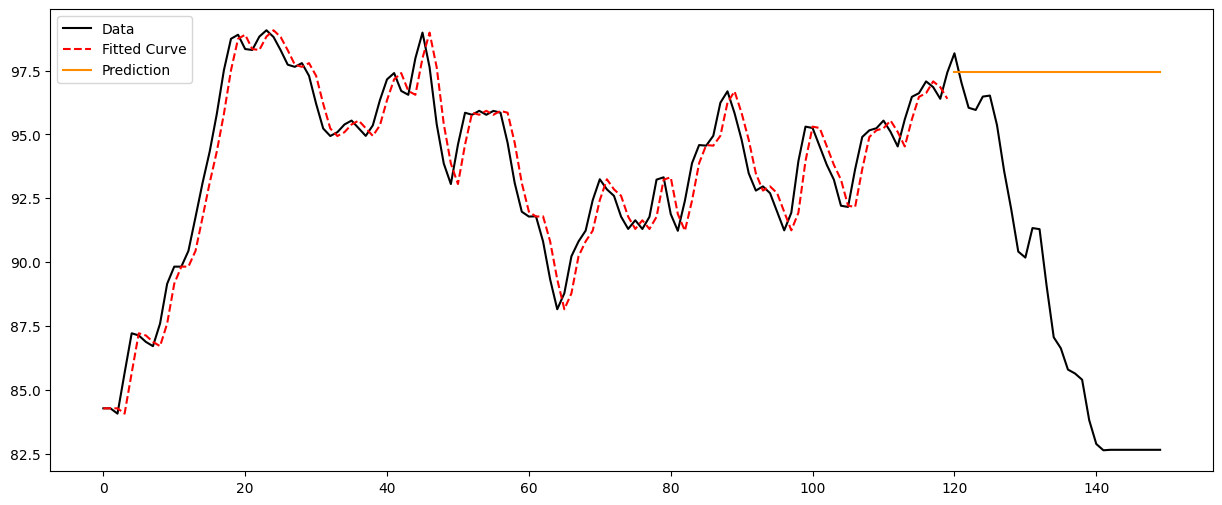

In [10]:
fig, ax = plt.subplots(figsize=(15,6))
rate_df.plot(ax=ax, color='black', label='Data')
fit1.fittedvalues.plot(ax=ax, color='red', linestyle='--', label='Fitted Curve')
y_pred1.plot(ax=ax, color='darkorange', label='Prediction')
plt.legend()
plt.show()

In [18]:
rate_df

0      84.2697
1      84.2697
2      84.0619
3      85.6542
4      87.2093
        ...   
145    82.6450
146    82.6450
147    82.6450
148    82.6450
149    82.6450
Name: Heart Rate, Length: 150, dtype: float64

## Holt's Linear

The Holt's linear model can be done using the `Holt` or the `ExponentialSmoothing` functions.

In the following exercise, we will use the `ExponentialSmoothing` and a Time Series that is supposed to have no seasonality: beer_df.

**1. Separate the beer_df in a training and a testing set.**

In [19]:
step = int(0.8*len(resi_df))
resi_train, resi_test = resi_df[:step], resi_df[step:]

Holt's Linear is a simple model with no seasonality.<br> Thus, the `seasonal` parameter should be set to `None` in the ExponentialSmoothing function. 

The `trend` parameter can be set to `add` or `mul`.<br>
Refer to the explanation of the ExponentialSmoothing function to know which one to use.

**2.a. Use the `ExponentialSmoothing` function by setting the `trend` parameter to `'add'` or `'mul'` (explain your choice !). Fit the model using the `fit()` method. Save the result of the fit in a variable.**

In [20]:
s_exp = ExponentialSmoothing(resi_train,
                             trend='add',
                             seasonal=None,
                             initialization_method='estimated')
fit2 = s_exp.fit()
resi_test

1988-10-31    16777.2
1989-01-31    16833.1
1989-04-30    16891.6
1989-07-31    16956.8
1989-10-31    17026.3
1990-01-31    17085.4
1990-04-30    17106.9
1990-07-31    17169.4
1990-10-31    17239.4
1991-01-31    17292.0
1991-04-30    17354.2
1991-07-31    17414.2
1991-10-31    17447.3
1992-01-31    17482.6
1992-04-30    17526.0
1992-07-31    17568.7
1992-10-31    17627.1
1993-01-31    17661.5
Freq: 3M, Name: Australian Residents, dtype: float64

**2.b. Predict the test set using the `forecast()` method on the results of the `fit()` method. Get the smoothing level (alpha) and the smoothing trend (beta) optimized parameters.** 

In [21]:
y_pred2 = fit2.forecast(steps = len(resi_test))
y_pred2.head()

1988-10-31    16772.26352
1989-01-31    16847.52704
1989-04-30    16922.79056
1989-07-31    16998.05408
1989-10-31    17073.31760
Freq: 3M, dtype: float64

In [ ]:
alpha = fit2.model.params["smoothing_level"]
beta = fit2.model.params["smoothing_trend"]
print(f"The alpha parameter is {alpha}")
print(f"The beta parameter is {beta}")

The alpha parameter is 0.9999999850984497
The beta parameter is 0.5105210999963523


**3. Plot the predictions, the values of the test set, the values of the train set and the fitted values (use `.fittedvalues` on the fit results) on the same graph.**

*Tips: The predictions should be an affine function (ax + b). If not, you are doing something wrong.*

In [12]:
resi_df

1971-01-31    13067.3
1971-04-30    13130.5
1971-07-31    13198.4
1971-10-31    13254.2
1972-01-31    13303.7
               ...   
1992-01-31    17482.6
1992-04-30    17526.0
1992-07-31    17568.7
1992-10-31    17627.1
1993-01-31    17661.5
Freq: 3M, Name: Australian Residents, Length: 89, dtype: float64

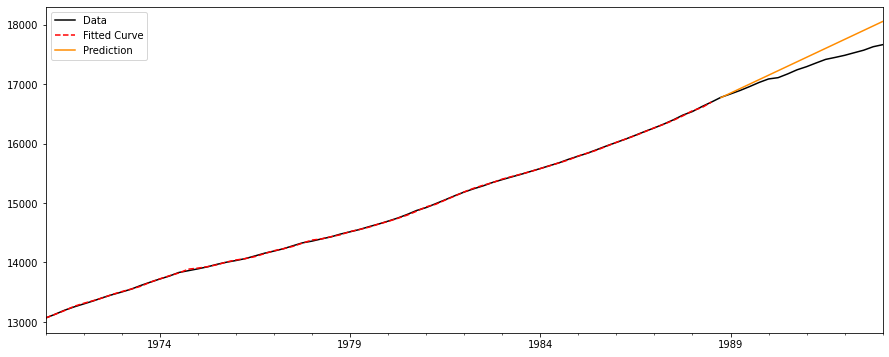

In [ ]:
fig, ax = plt.subplots(figsize=(15,6))
resi_df.plot(ax=ax, color='black', label='Data')
fit2.fittedvalues.plot(ax=ax, color='red', linestyle='--', label='Fitted Curve')
y_pred2.plot(ax=ax, color='darkorange', label='Prediction')
plt.legend()
plt.show()

ExponentialSmoothing has a `damped_trend` parameter that can be used to modify the trend:

*   **damped_trend**: This parameter is only used when the trend is set to 'add' or 'additive'. If set to True, the trend is damped, otherwise the trend is not damped. When the trend is damped, it means that the model assumes that the trend will eventually reach a steady state instead of continuing indefinitely. This can be useful in situations where there is a known long-term equilibrium level that the series is approaching.

In general, damped is used when the data has a trend that is expected to converge to a steady state. The Holt's linear model with a damped trend is generally use as a benchmark.

**4. Do the same as question 2 and 3 with a damped trend Holt's linear model. Compare with no damped trend.**

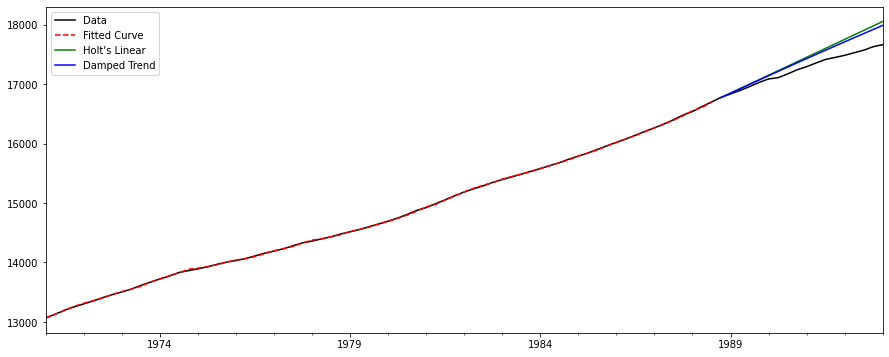

In [ ]:
s_exp = ExponentialSmoothing(resi_train,
                             trend='add',
                             damped_trend=True,
                             seasonal=None,
                             initialization_method='estimated')
fit3 = s_exp.fit()

y_pred3 = fit3.forecast(steps = len(resi_test))
y_pred3.head()

fig, ax = plt.subplots(figsize=(15,6))
resi_df.plot(ax=ax, color='black', label='Data')
fit3.fittedvalues.plot(ax=ax, color='red', linestyle='--', label='Fitted Curve')
y_pred2.plot(ax=ax, color='green', label="Holt's Linear")
y_pred3.plot(ax=ax, color='blue', label='Damped Trend')
plt.legend()
plt.show()

## Holt's Winters

The Holt's Winters model can be done using the `ExponentialSmoothing` function.

In the following exercise, we will use two Time Series that are supposed to have trend and seasonality : airp_df and beer_df.

**1. Separate the airp_df in a training and a testing set.**

In [ ]:
step = int(0.8*len(airp_df))
airp_train, airp_test = airp_df[:step], airp_df[step:]

Holt's Winters is expecting seasonality.<br> Thus, the `seasonal` parameter should be set to `add` or `mul` in the `ExponentialSmoothing` function. <br> The `trend` parameter should also be set to `add` or `mul`.<br>

Additionally, the `seasonal_periods` should be set to the seasonality period of the Time Series.

Refer to the explanation of the `ExponentialSmoothing` function to know which one to use. If you are unsure about the `mul` and `add` arguments of the trend and seasonality parameters, you can compare the AICc values by using .aicc on the `fit()` results.

**2.a. Use the `ExponentialSmoothing` function by setting the `trend` and `seasonal` parameters to `'add'` or `'mul'` (explain your choice !). Find the seasonal period of the airp_df Time Series and set the `seasonal_periods` parameter. Fit the model using the `fit()` method. Save the result of the fit in a variable.**

In [ ]:
seasonality = 12  # monthly data with monthly seasonality
s_exp = ExponentialSmoothing(airp_train,
                             trend='add',              # Trend seems to grow linearly
                             seasonal='mul',           # Seasonality pattern seems to vary over time
                             seasonal_periods=seasonality,
                             initialization_method='estimated')
fit4 = s_exp.fit()

**2.b. Predict the test set using the `forecast()` method on the results of the `fit()` method. Get the smoothing level (alpha), the smoothing trend (beta) and the smoothing seasonal (gamma) optimized parameters.** 

In [ ]:
y_pred4 = fit4.forecast(steps = len(airp_test))
y_pred4.head()

1958-08-31    485.501716
1958-09-30    426.475725
1958-10-31    370.782834
1958-11-30    324.374964
1958-12-31    365.704037
Freq: M, dtype: float64

In [ ]:
alpha = fit4.model.params["smoothing_level"]
beta = fit4.model.params["smoothing_trend"]
gamma = fit4.model.params["smoothing_seasonal"]
print(f"The alpha parameter is {alpha}")
print(f"The beta parameter is {beta}")
print(f"The gamma parameter is {gamma}")

The alpha parameter is 0.9999999848003507
The beta parameter is 1.6623652338573094e-10
The gamma parameter is 1.5131237679404953e-08


**3. Plot the predictions, the values of the test set, the values of the train set and the fitted values (use `.fittedvalues` on the fit results) on the same graph.**

*Tips: The predictions should be a polynomial function. If not, you are doing something wrong.*

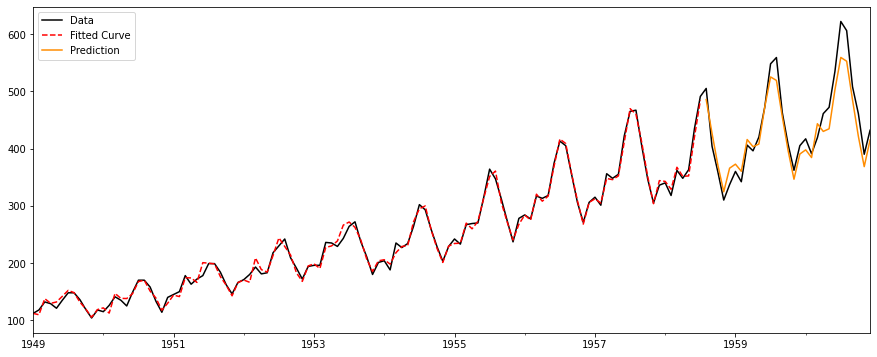

In [ ]:
fig, ax = plt.subplots(figsize=(15,6))
airp_df.plot(ax=ax, color='black', label='Data')
fit4.fittedvalues.plot(ax=ax, color='red', linestyle='--', label='Fitted Curve')
y_pred4.plot(ax=ax, color='darkorange', label='Prediction')
plt.legend()
plt.show()

**4. Do the same for the beer_df Time Series.**

*Tips: If the trend seems to flatten over time, it may be a good idea to use a damped trend.*

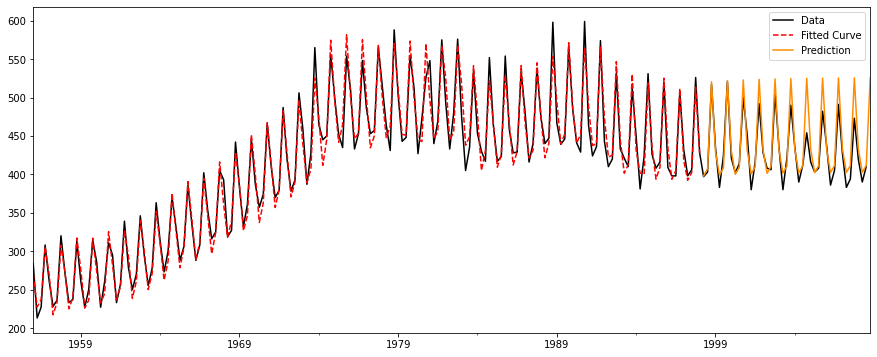

In [ ]:
step = int(0.8*len(beer_df))
beer_train, beer_test = beer_df[:step], beer_df[step:]

seasonality = 4   # quaterly data with quaterly seasonality
s_exp = ExponentialSmoothing(beer_train,
                             trend='add',                  # Trend seems to grow linearly
                             seasonal='mul',               # Seasonality pattern seems to vary over time
                             damped_trend=True,            # Trend seems to flatten over time
                             seasonal_periods=seasonality,
                             initialization_method='estimated')
fit5 = s_exp.fit()

y_pred5 = fit5.forecast(steps = len(beer_test))
y_pred5.head()

fig, ax = plt.subplots(figsize=(15,6))
beer_df.plot(ax=ax, color='black', label='Data')
fit5.fittedvalues.plot(ax=ax, color='red', linestyle='--', label='Fitted Curve')
y_pred5.plot(ax=ax, color='darkorange', label='Prediction')
plt.legend()
plt.show()

# ARIMA

The ARIMA (including AR, MA, ARMA, SARIMA and SARIMAX) models can be done using the statsmodel library.

Many functions are available:

*   `AutoReg` - It is an AR model function (see lesson for more info)
*   `ARIMA` - It is a versatile function that can model the AR, MA, ARMA and the ARIMA models (see lesson for more info)
*   `SARIMAX` - It is an even more versatile function that can model the AR, MA, ARMA, ARIMA, SARIMA and the SARIMAX models (see lesson for more info)
*   `ARDL` - It combines both Autoregressive (AR) and Distributed Lag (DL) models to capture both short-term and long-term relationships in the data. The AR component captures the short-term dynamics, while the DL component captures the long-term dynamics. The model also allows for the estimation of cointegration among the variables, which means that it can be used to analyze data that may be non-stationary.

## ARIMA

In the following exercise, we'll use the `ARIMA` function from the statsmodels library. 

Explanations about some of the most important `ARIMA` parameters:

*   **order**: A tuple of integers representing the (p,d,q) values of the model. The 'p' value is the order of the autoregressive term, the 'd' value is the order of differencing, and the 'q' value is the order of the moving average term. The 'p' value determines the number of lag observations included in the model, 'd' value is used to make the time series stationary and 'q' value determines the size of the moving average window.
*   **exog**: An optional array-like object containing exogenous variables to be used in the model. This can be used to include other variables that may be related to the time series data. Use it to build an ARIMAX model.
*   **trend**: A string representing the trend component of the model. Options include 'c' for a constant term, 'ct' for a constant and linear trend, and 'ctt' for a constant, linear, and quadratic trend.

There is a `seasonal_order` parameter in the ARIMA function. However, do not forget that ARIMA is a non seasonal process and thus, it is advised to use the SARIMA function instead of the ARIMA one when the Time Series shows a seasonality.

The ARIMA model can be done using the `ARIMA` function.

In the following exercise, we will use the resi_df Time Series.

**1. Separate the airp_df in a training and a testing set.**

In [ ]:
step = int(0.8*len(resi_df))
resi_train, resi_test = resi_df[:step], resi_df[step:]

**2. Check the stationarity of the Time Series with the ADF and the KPSS tests.**

In [ ]:
from statsmodels.tsa.stattools import adfuller, kpss

def test_stationarity(df, **kwargs):
    ## ADFuller
    adf_result = adfuller(df, **kwargs)

    if adf_result[1] < 0.05: adf_decision = 'Stationary'
    else : adf_decision = 'Non-Stationary'

    adf_dict = {'decision': adf_decision,
                'Test Statistic': adf_result[0],
                'p-value': adf_result[1],
                'Numbers of lags': adf_result[2]}
    
    for key, value in adf_result[4].items():
        adf_dict[f"Critical Value {key}"] = value
    
    ## KPSS
    kpss_result = kpss(df, **kwargs)
    
    if kpss_result[1] > 0.05: kpss_decision = 'Stationary'
    else : kpss_decision = 'Non-Stationary'

    kpss_dict = {'Decision': kpss_decision,
                 'Test Statistic': kpss_result[0],
                 'p-value': kpss_result[1],
                 'Numbers of lags': kpss_result[2]}

    for key, value in kpss_result[3].items():
        if key != "2.5%" :
            kpss_dict[f"Critical Value {key}"] = value

    df = pd.DataFrame(adf_dict.values(), columns=['ADF'], index=adf_dict.keys())
    df['KPSS'] = kpss_dict.values()
    return df

In [ ]:
test_stationarity(resi_train)

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


,ADF,KPSS
decision,Non-Stationary,Non-Stationary
Test Statistic,2.189273,1.287176
p-value,0.998874,0.01
Numbers of lags,6,5
Critical Value 1%,-3.536928,0.347
Critical Value 5%,-2.907887,0.463
Critical Value 10%,-2.591493,0.739


**3. First, make the Time Series stationary (if needed). Then, plot the ACF and the PACF graphs and find the p,q and d parameters.**

In [ ]:
resi_diff = resi_train.diff(1).diff(1).dropna()
test_stationarity(resi_diff)

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


,ADF,KPSS
decision,Stationary,Stationary
Test Statistic,-3.711619,0.320697
p-value,0.003953,0.1
Numbers of lags,6,22
Critical Value 1%,-3.540523,0.347
Critical Value 5%,-2.909427,0.463
Critical Value 10%,-2.592314,0.739


/usr/local/lib/python3.8/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


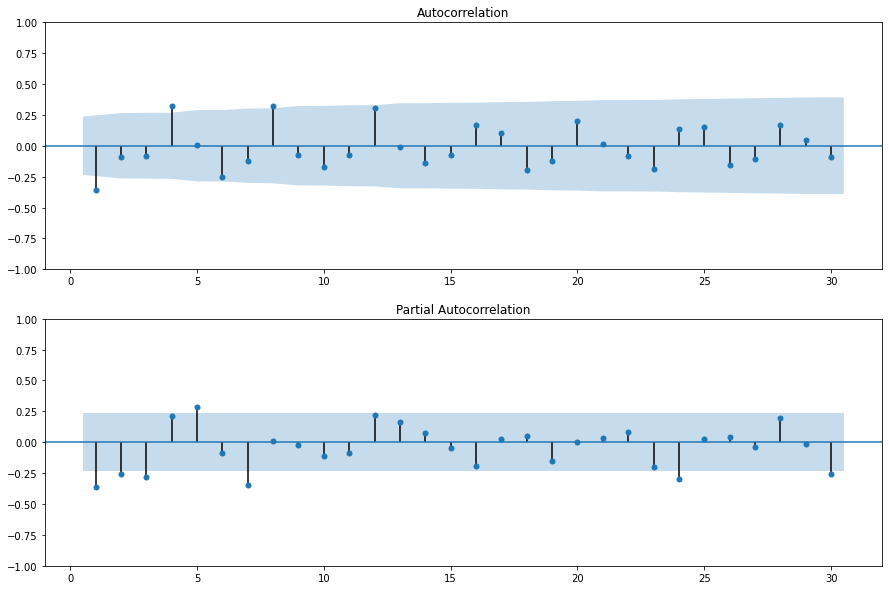

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, axs = plt.subplots(2,1,figsize=(15,10))
g1 = plot_acf(resi_diff, zero=False, lags=30, ax=axs[0])
g2 = plot_pacf(resi_diff, zero=False, lags=30, ax=axs[1])
plt.show()

The `fit()` method of the ARIMA class has several optional parameters including. Some of the most important includes:

* **method** : The optimization method to use when fitting the model. Valid options include statespace (uses a state-space representation of the model), innovations_mle (uses the Maximum Likelihood Estimator), hannan_rissanen (uses the Hannan-Rissanen algorithm, it is useful for models with many parameters or for non-stationary models), burg (uses the Burg algorithm, it is useful for models with autoregressive components), innovations (useful for models with moving average components), and yule_walker (uses the Yule-Walker algorithm, it is useful for autoregressive (AR) models).

* **gls** : A boolean indicating whether to use Generalized Least Squares (GLS) when fitting the model. GLS is a method of estimating the parameters of a linear model that is robust to certain types of non-normality in the errors.

* **cov_type** : The type of covariance matrix to use when fitting the model. The options are 'nonrobust', 'HC0', 'HC1', 'HC2', 'HC3', 'HC4' (for heteroskedasticity consistent covariance matrix) and 'opg' (for outer product of the gradient estimator). The choice of the covariance type (OPG, HC, or Nonrobust) depends on the assumptions of the model and the properties of the data. OPG is particularly useful for large datasets or models with many parameters, and it is often used in maximum likelihood estimation. However, the OPG method is not robust to misspecifications in the model, it can give unreliable results if the model is misspecified. If the model is misspecified, Nonrobust or HC method should be used as they are robust to model misspecifications but at the cost of being less efficient.

`fit()` [Documentation](https://www.statsmodels.org/dev/generated/statsmodels.tsa.arima.model.ARIMA.fit.html#statsmodels.tsa.arima.model.ARIMA.fit)

**4. Train an ARIMA model using the ARIMA class from the statsmodels library. Save the result of the fit() in a variable.**

*Tips : Refer to the beginning of this exercise for the ARIMA function parameters.*

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
arima = ARIMA(resi_train,
              order=(3,2,1))   # Values obtained by looking at the ACF and PACF
fit1 = arima.fit()

You can get a summary of information and statistics concerning the ARIMA model results by using the `summary()` method.

The **first part of the table** is about the model information (type, orders, parameters ..) and the model fit statistics such as the Log-Likelihood, AIC, BIC, and HQIC. These statistics are used to evaluate the goodness of fit of the model and to compare different models.

The **second part of the table** is about the coefficients of the model:
* **coef** : The estimated value of the coefficient of the model.

* **std err** : The standard error of the coefficient. It is used to estimate the precision of the coefficient estimate.

* **z** : The z-statistic of the coefficient, which is the ratio of the coefficient estimate to its standard error. It is used to test the null hypothesis that the coefficient is equal to zero.

* **P>|z|** : The p-value of the z-statistic, which is the probability of obtaining a z-statistic as extreme or more extreme than the observed one, if the null hypothesis (H0: a given coefficient is equal to zero) were true. Typically, a coefficient is considered significant if its p-value is less than 0.05.

* **[0.025 0.975]** : The 95% confidence interval of the coefficient. It is an interval estimate of the true value of the coefficient, based on the sample data and the assumptions of the model.

The **third part of the table** is related to the diagnostic test of the residuals of the model:
* **Ljung-Box (L1) (Q)**: This is a test of the independence of the residuals, commonly known as Ljung-Box test. It test the null hypothesis that the residuals of the model are independent and uncorrelated. The test statistic Q is provided, and its p-value is also provided in Prob(Q), the p-value represents the probability of obtaining a test statistic as extreme or more extreme than the one observed, if the null hypothesis were true.

* **Jarque-Bera (JB)**: This is a test of normality of the residuals. It tests the null hypothesis that the residuals are normally distributed. The test statistic JB is provided, and its p-value is also provided in Prob(JB), the p-value represents the probability of obtaining a test statistic as extreme or more extreme than the one observed, if the null hypothesis were true.

* **Heteroskedasticity (H)**: This is a test of homoscedasticity, meaning that the variance of the residuals is constant across the observations. It test the null hypothesis that the residuals are homoscedastic. The test statistic H is provided, and its p-value is also provided in Prob(H) (two-sided), the p-value represents the probability of obtaining a test statistic as extreme or more extreme than the one observed, if the null hypothesis were true.

* **Skew**: This is a measure of the skewness of the residuals, which is a measure of the asymmetry of the residuals distribution.

* **Kurtosis**: This is a measure of the kurtosis of the residuals, which is a measure of the peakedness of the residuals distribution.

For these three tests, a low Prob() suggests that the assumptions is not followed by the residuals.


ARIMAResults [Documentation](https://www.statsmodels.org/dev/generated/statsmodels.tsa.arima.model.ARIMAResults.html#statsmodels.tsa.arima.model.ARIMAResults)

**5. Display the summary of the model using the summary() method on the fit result.**

In [ ]:
fit1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                SARIMAX Results                                 
================================================================================
Dep. Variable:     Australian Residents   No. Observations:                   71
Model:                   ARIMA(3, 2, 1)   Log Likelihood                -237.968
Date:                  Mon, 16 Jan 2023   AIC                            485.936
Time:                          17:12:38   BIC                            497.106
Sample:                      01-31-1971   HQIC                           490.368
                           - 07-31-1988                                         
Covariance Type:                    opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7800      0.397     -1.967      0.049      -1.557      -0.003
ar.L2         -0.4895      0.249     -1.963      0.050      -0.978      -0.001
ar.L3         -0.3772      0.171     -2.203      0.028      -0.713      -0.042
ma.L1          0.2910      0.416      0.700      0.484      -0.524       1.106
sigma2        57.3695      9.769      5.872      0.000      38.222      76.517
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                 4.32
Prob(Q):                              0.85   Prob(JB):                         0.12
Heteroskedasticity (H):               0.74   Skew:                            -0.44
Prob(H) (two-sided):                  0.47   Kurtosis:                         3.85
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

The `plot_diagnostics()` method can be used to produce a set of diagnostic plots for assessing the model fit (OLS assumptions on residuals). It includes:

* **Standardized residuals**: This plot shows the standardized residuals of the model, which are the residuals divided by their standard deviation. The residuals should be normally distributed with zero mean and constant variance if the model is correct.

* **Normal Q-Q**: This plot shows a normal probability plot of the residuals. The residuals should be normally distributed if the model is correct.

* **Correlogram**: This plot shows the autocorrelation function (ACF) of the residuals. The residuals should be uncorrelated if the model is correct.

* **Histogram**: This plot shows the histogram of the residuals. The residuals should be normally distributed with zero mean and constant variance if the model is correct.

`plot_diagnostics()` [Documentation](https://www.statsmodels.org/dev/generated/statsmodels.tsa.arima.model.ARIMAResults.plot_diagnostics.html#statsmodels.tsa.arima.model.ARIMAResults.plot_diagnostics)

**6. Use the plot_diagnostics() method and analyze the graphs. <br>Are the OLS assumptions (homoscedasticity, normality with mean of 0, uncorrelation) valid ?**

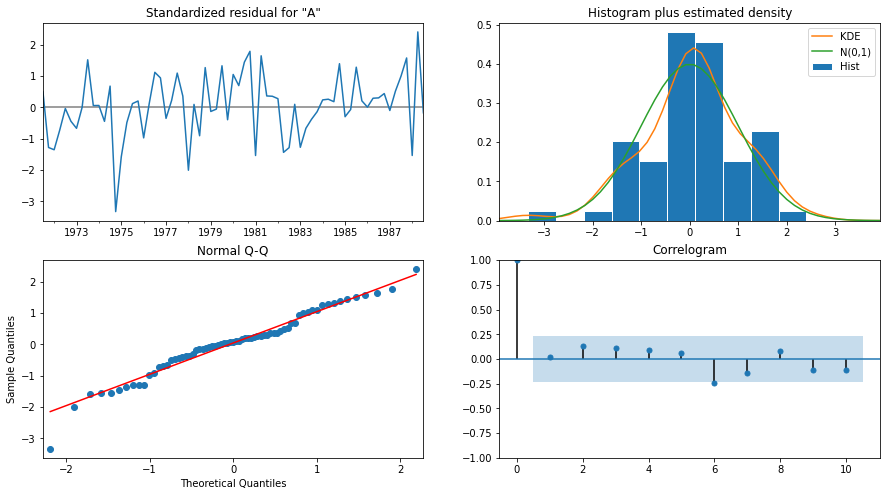

In [ ]:
g = fit1.plot_diagnostics(figsize=(15,8))
plt.show()

The `forecast()` method can be used on the fit result to get the predictions. You must specify the number of steps to predict from the last training data point.

`forecast()` [Documentation](https://www.statsmodels.org/dev/generated/statsmodels.tsa.arima.model.ARIMAResults.forecast.html#statsmodels.tsa.arima.model.ARIMAResults.forecast)

**7. Predict the test set using the `forecast()` method. Display a graph with the predictions and the true values.**

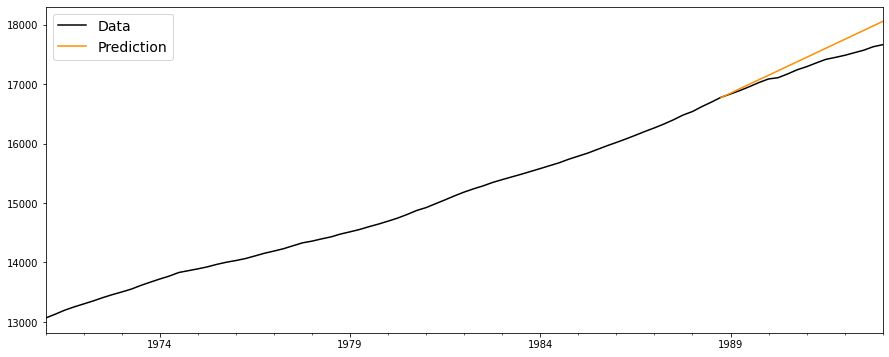

In [ ]:
# Predictions
y_pred1 = fit1.forecast(len(resi_test))
y_pred1.index = resi_test.index

fig, ax = plt.subplots(figsize=(15,6))

resi_df.plot(ax=ax, color='black', label='Data')
y_pred1.plot(ax=ax, color='darkorange', label='Prediction')

plt.legend(fontsize=14)
plt.show()

AIC and BIC are model selection criteria that can be used to compare different models and determine the best one for a given dataset. They take into account both the goodness of fit of the model and the complexity of the model, which is represented by the number of parameters.

While ACF and PACF can be useful tools for identifying the appropriate values of d, p, and q, they do not take into account the complexity of the model and rely on human (subjective) analysis. Thus, AIC and BIC are more appropriate, more robust, when comparing different models and determining the best one.

**8.a. Test many ARIMA model with different (p,d,q) parameter sets using a loop and compare their AICc values**

In [ ]:
from itertools import product
import warnings

def find_best_arima(data, max_p, max_q, max_d):
    comb = product(*[range(max_p+1), range(max_d+1), range(max_q+1)])
    aicc = np.inf
    for (p,d,q) in comb:
        if p == q == 0 : continue
        arima = ARIMA(data,
                      order=(p,d,q))   # Values obtained by looking at the ACF and PACF
        fit2 = arima.fit()
        if aicc > fit2.aicc :
            aicc = fit2.aicc
            best_model = arima
            best_fit = fit2
    return best_model, best_fit

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    model, fitted= find_best_arima(resi_train, 3,3,3)
    
fitted.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                SARIMAX Results                                 
================================================================================
Dep. Variable:     Australian Residents   No. Observations:                   71
Model:                   ARIMA(3, 2, 2)   Log Likelihood                -229.342
Date:                  Mon, 16 Jan 2023   AIC                            470.685
Time:                          17:13:11   BIC                            484.089
Sample:                      01-31-1971   HQIC                           476.003
                           - 07-31-1988                                         
Covariance Type:                    opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5319      0.113     -4.695      0.000      -0.754      -0.310
ar.L2         -0.9764      0.018    -53.891      0.000      -1.012      -0.941
ar.L3         -0.5645      0.116     -4.865      0.000      -0.792      -0.337
ma.L1          0.0423      0.074      0.575      0.566      -0.102       0.187
ma.L2          0.9873      0.367      2.693      0.007       0.269       1.706
sigma2        41.1489     13.473      3.054      0.002      14.743      67.555
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                19.28
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               0.89   Skew:                            -0.76
Prob(H) (two-sided):                  0.78   Kurtosis:                         5.10
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

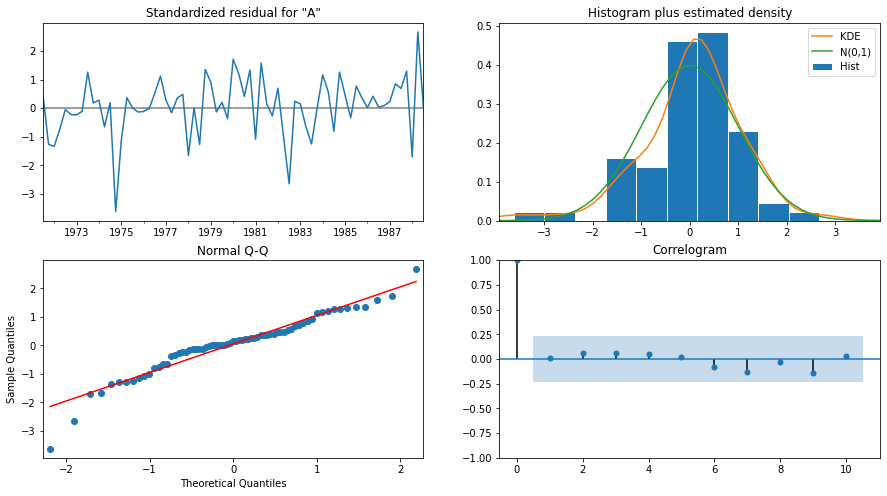

In [ ]:
g = fitted.plot_diagnostics(figsize=(15,8))

**8.b. Predict the test set using the `forecast()` method and display the predictions on a graph along with the true values.**

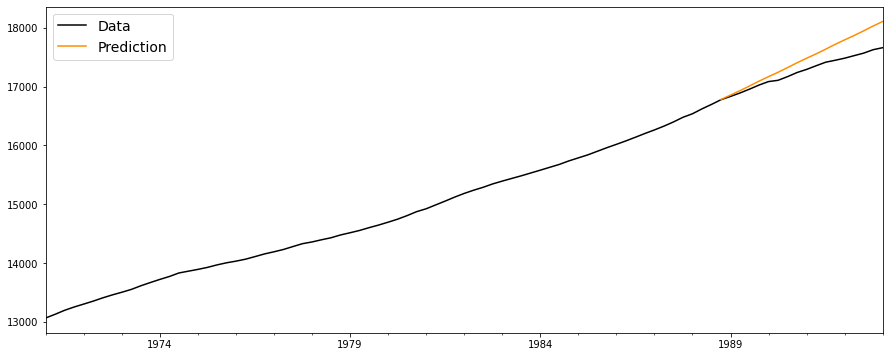

In [ ]:
y_pred2 = fitted.forecast(len(resi_test))
y_pred2.index = resi_test.index

fig, ax = plt.subplots(figsize=(15,6))

resi_df.plot(ax=ax, color='black', label='Data')
y_pred2.plot(ax=ax, color='darkorange', label='Prediction')

plt.legend(fontsize=14)
plt.show()

Confidence interval can be obtained through the `get_prediction()` method. Two parameters must be specified:


*   **start**: The starting index for the prediction. It can be an integer, a string or even a Datetime object.
*   **start**: The ending index for the prediction. It can be an integer, a string or even a Datetime object.

The output of the get_prediction() function can then be used to get the predictions and the confidence interval using the `predicted_mean` attribute and the `conf_int(alpha)` method respectively. 

`get_prediction()` [Documentation](https://www.statsmodels.org/dev/generated/statsmodels.tsa.arima.model.ARIMAResults.get_prediction.html#statsmodels.tsa.arima.model.ARIMAResults.get_prediction)

**9. Use the `get_prediction()` method on the fit result to get the predictions (using `predicted_mean`) and the confidence interval at 95% (using `conf_int(alpha=0.05)`). Display them on a graph.**


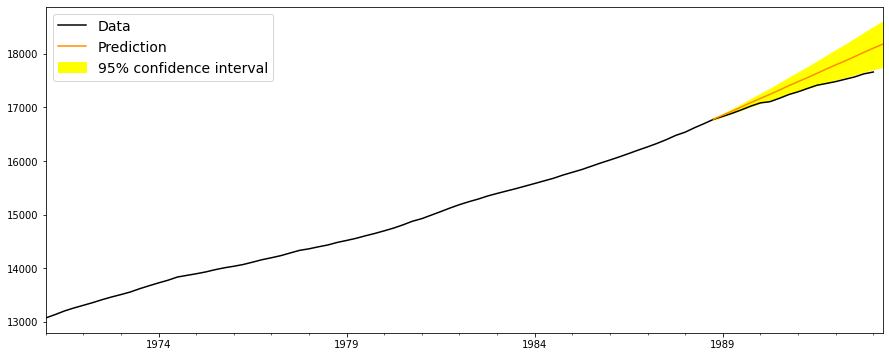

In [ ]:
y_pred3 = fitted.get_prediction(start=len(resi_train), 
                                end=len(resi_train)+len(resi_test))
y_pred3_mean = y_pred3.predicted_mean
conf_int = y_pred3.conf_int(0.05)

fig, ax = plt.subplots(figsize=(15,6))

resi_df.plot(ax=ax, color='black', label='Data')
y_pred3_mean.plot(ax=ax, color='darkorange', label='Prediction')
plt.fill_between(conf_int.index, conf_int.iloc[:,0], conf_int.iloc[:,1], color='yellow', label='95% confidence interval')

plt.legend(loc="upper left", fontsize=14)
plt.show()

## SARIMA

ARIMA is a nonseasonal process. In order to add the effect of the seasonality, you should use the Seasonal ARIMA i.e. SARIMA.

The statsmodels library has a `SARIMAX` version that includes exogeneous variables to the SARIMA model.

Some of the most important parameters are:



*   **endog**: The time series data that the model will be fit to.
*   **order**: A tuple specifying the (p, d, q) order of the seasonal component of the model. A high order value will result in a more complex model, but may lead to overfitting. A low order value will result in a simpler model, but may not capture all of the underlying patterns in the data.
*   **seasonal_order**: A tuple specifying the (P, D, Q, m) order of the seasonal component of the model, where m is the number of time steps per seasonal period.
*   **exog**: An optional array of exogenous variables to include in the model. Using exogenous variables can provide additional insight into the factors that are driving changes in the time series data. However, it's important to be careful when including exogenous variables in a model, as they can also lead to overfitting or incorrect conclusions if not used appropriately.
*   **enforce_stationarity** and **enforce_invertibility** : Boolean flags that determine whether or not to transform the parameters to enforce stationarity or invertibility of the model. Invertibility refers to the property of a model that allows for a unique and stable solution to be found for the model's parameters. When fitting a time series model, it is generally desirable to have an invertible model because it is more likely to give stable and meaningful results.

`SARIMAX` [Documentation](https://www.statsmodels.org/stable/generated/statsmodels.tsa.statespace.sarimax.SARIMAX.html#statsmodels.tsa.statespace.sarimax.SARIMAX)

**1. Find the parameter of a SARIMA model for the beer_df Time Series.**

In [ ]:
beer_diff = beer_train.diff(1).diff(4).dropna()
test_stationarity(beer_diff)

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


,ADF,KPSS
decision,Stationary,Stationary
Test Statistic,-6.264407,0.068227
p-value,0.0,0.1
Numbers of lags,11,8
Critical Value 1%,-3.474121,0.347
Critical Value 5%,-2.88075,0.463
Critical Value 10%,-2.577013,0.739


/usr/local/lib/python3.8/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


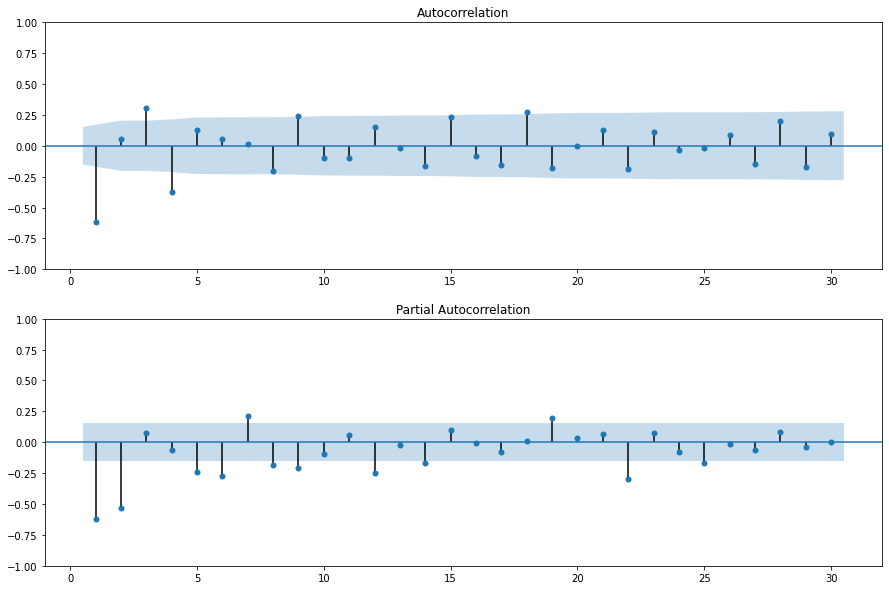

In [ ]:
# Order = (2,1,1)
# Seasonal Order = (0,1,1,4)

fig, axs = plt.subplots(2,1,figsize=(15,10))
g1 = plot_acf(beer_diff, zero=False, lags=30, ax=axs[0])
g2 = plot_pacf(beer_diff, zero=False, lags=30, ax=axs[1])
plt.show()

**2. Train a SARIMA model on the beer_df Time Series. Analyze the summary() and the plot_diagnostics(). What are your conclusions ?**

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
sarima = SARIMAX(beer_train,
                 order=(1,1,2),
                 seasonal_order=(0,1,1,4))

fit = sarima.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                     Beer Production   No. Observations:                  169
Model:             SARIMAX(1, 1, 2)x(0, 1, [1], 4)   Log Likelihood                -686.207
Date:                             Mon, 16 Jan 2023   AIC                           1382.414
Time:                                     17:13:16   BIC                           1397.914
Sample:                                 01-31-1956   HQIC                          1388.706
                                      - 01-31-1998                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0857      0.163      0.524      0.600      -0.235       0.406
ma.L1         -1.0492      0.159     -6.602      0.000      -1.361      -0.738
ma.L2          0.4526      0.119      3.796      0.000       0.219       0.686
ma.S.L4       -0.7708      0.050    -15.428      0.000      -0.869      -0.673
sigma2       246.0994     23.970     10.267      0.000     199.119     293.080
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 4.03
Prob(Q):                              0.93   Prob(JB):                         0.13
Heteroskedasticity (H):               2.21   Skew:                            -0.04
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.76
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

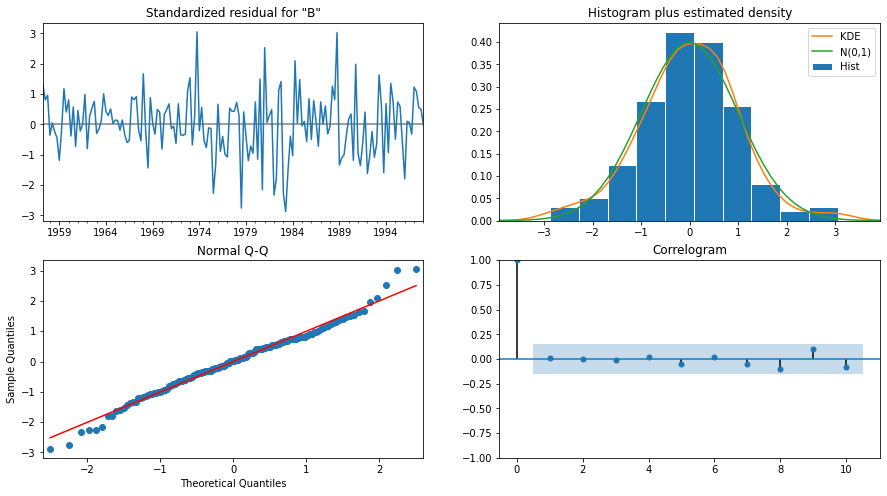

In [ ]:
g = fit.plot_diagnostics(figsize=(15,8))

In [ ]:
# Everything looks good but the model's residuals are not homoscedastic.
# A log transformation solves this problem :
sarima = SARIMAX(np.log(beer_train),
                 order=(1,1,2),
                 seasonal_order=(0,1,1,4))

fit = sarima.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                     Beer Production   No. Observations:                  169
Model:             SARIMAX(1, 1, 2)x(0, 1, [1], 4)   Log Likelihood                 313.057
Date:                             Mon, 16 Jan 2023   AIC                           -616.114
Time:                                     17:13:21   BIC                           -600.615
Sample:                                 01-31-1956   HQIC                          -609.822
                                      - 01-31-1998                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0057      0.197     -0.029      0.977      -0.392       0.381
ma.L1         -0.9624      0.193     -4.987      0.000      -1.341      -0.584
ma.L2          0.3869      0.151      2.563      0.010       0.091       0.683
ma.S.L4       -0.7805      0.067    -11.669      0.000      -0.912      -0.649
sigma2         0.0013      0.000      8.577      0.000       0.001       0.002
===================================================================================
Ljung-Box (L1) (Q):                   0.22   Jarque-Bera (JB):                 1.48
Prob(Q):                              0.64   Prob(JB):                         0.48
Heteroskedasticity (H):               0.80   Skew:                            -0.22
Prob(H) (two-sided):                  0.42   Kurtosis:                         2.84
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

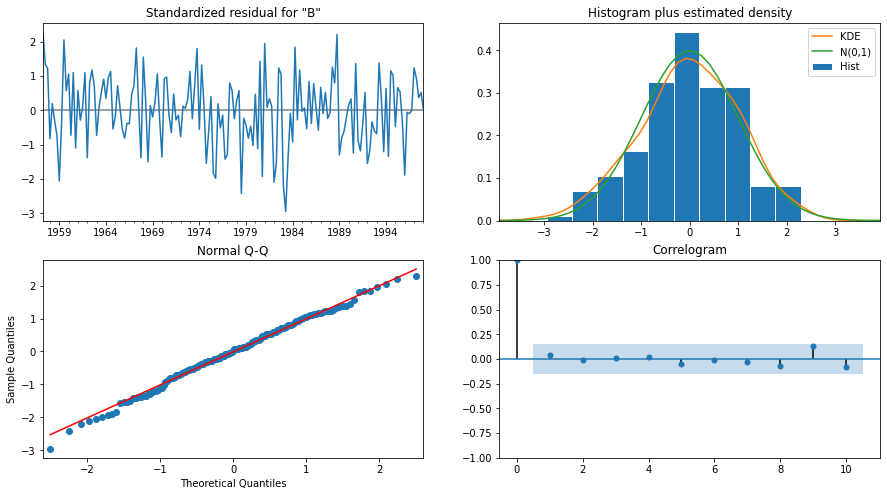

In [ ]:
g = fit.plot_diagnostics(figsize=(15,8))

**3. Predict the test set and display everything on a graph.**

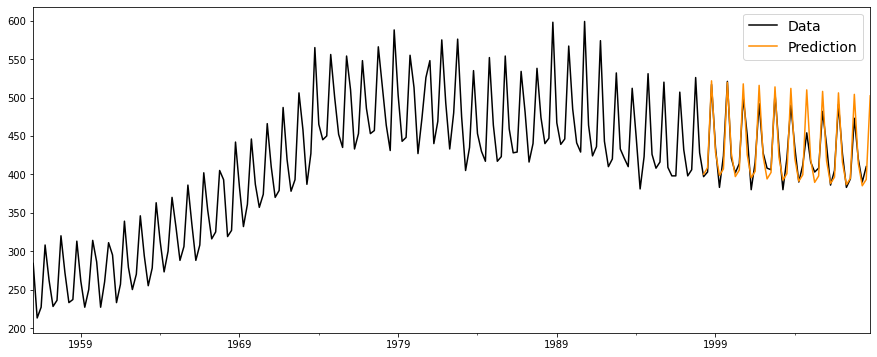

In [ ]:
# Exponential to reverse the logarithm
y_pred = np.exp(fit.forecast(len(beer_test)))

fig, ax = plt.subplots(figsize=(15,6))

beer_df.plot(ax=ax, color='black', label='Data')
y_pred.plot(ax=ax, color='darkorange', label='Prediction')

plt.legend(fontsize=14)
plt.show()

## Auto_Arima

The `auto_arima()` function from the pmdarima library is used to automatically select the best parameters for the ARIMA model by iteratively fitting different combinations of the p, d, and q parameters.

Some of the most important parameters:
* **start_p**, **start_q**, **max_p**, **max_q**, **max_d**: These parameters define the range of p, d, and q values that will be considered when fitting the model. start_p and start_q define the starting point for the search, while max_p and max_q define the upper limit of the search.

* **start_P**, **start_Q**, **max_P**, **max_Q** : Same as above but for the seasonal patterns.

* **m** : This parameter is used to specify the number of seasonal terms in the model. It should be set to the number of seasons in the data.

* **seasonal** : This parameter is used to specify whether to include a seasonal component in the model.

* **d**, **D** : These parameters are used to specify the order of differencing for the non-seasonal and seasonal components of the model, respectively.

* **stepwise** : This parameter is used to specify whether to use a stepwise approach to fitting the model. When set to True, the function will fit models with increasing complexity, starting from an ARIMA(0,0,0) model.

* **information_criterion**: The information criterion to compare models. Available criterion are ‘aic’, ‘bic’, ‘hqic’ and ‘oob’.

* **method**:The optimization algorithm used to find the best model. It can be 'newton' (It is considered to be a fast method, but it may not converge for some models), 'nm' for Nelder-Mead (It is a derivative-free optimization method that is robust to noise but may converge slowly), 'bfgs' (it is suitable for large datasets, but it may require a lot of memory), 'lbfgs' for limited-memory BFGS (It is suitable for large datasets but it requires less memory than the BFGS method), 'powell' (it is suitable for large datasets, but it may require a lot of function evaluations), 'cg' for conjugate gradient (It is suitable for large datasets, but it may converge slowly), 'ncg' for Newton-conjugate gradient(It is considered to be faster than the conjugate gradient method, but it may not converge for some models), 'basinhopping' for global basin-hopping solver (It is considered a robust method but it is also computationally).

**1. Use the auto_arima function to forecast the airp_df Time Series.**

In [ ]:
from pmdarima import auto_arima

stepwise_fit = auto_arima(airp_train,
                          start_p=0,
                          start_q=0,
                          max_p=5,
                          max_q=5,
                          m=12,
                          seasonal=True,
                          D=1)

stepwise_fit.fit(airp_train)
y_pred = stepwise_fit.predict(len(airp_test))

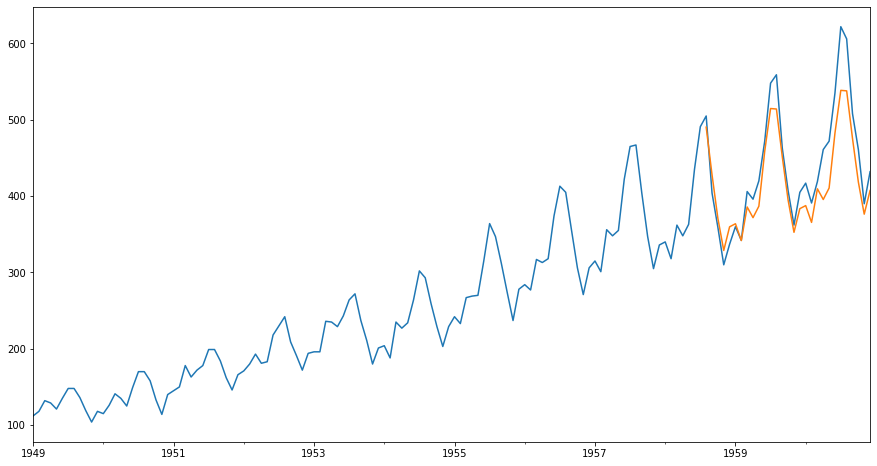

In [ ]:
airp_df.plot(figsize=(15,8))
y_pred.plot()
plt.show()

You can get:


*   The residuals by using .resid() on the result of the fit
*   The statistics and assumptions about the model residuals by using `summary()` or `plot_diagnostics()` on the result of the fit
*   The model parameters by using `params_` on the result of the fit

**2. Show the analyses on the model residuals.**

In [ ]:
stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  115
Model:             SARIMAX(1, 1, 0)x(0, 1, 0, 12)   Log Likelihood                -375.750
Date:                            Mon, 16 Jan 2023   AIC                            755.499
Time:                                    18:11:44   BIC                            760.749
Sample:                                01-31-1949   HQIC                           757.625
                                     - 07-31-1958                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2048      0.090     -2.271      0.023      -0.382      -0.028
sigma2        92.6974     13.326      6.956      0.000      66.579     118.816
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):                 2.44
Prob(Q):                              0.87   Prob(JB):                         0.30
Heteroskedasticity (H):               0.96   Skew:                             0.37
Prob(H) (two-sided):                  0.92   Kurtosis:                         2.86
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

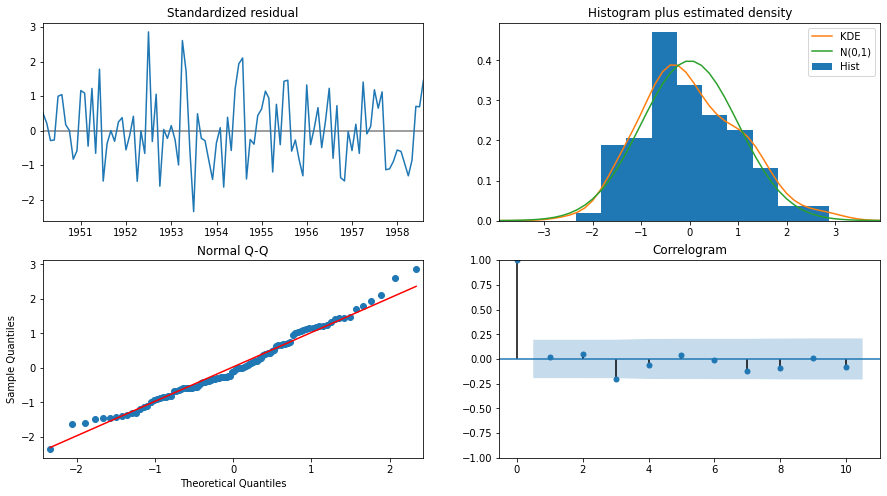

In [ ]:
g = stepwise_fit.plot_diagnostics(figsize=(15,8))